In [1]:
import pandas as pd

# Specify the encoding if you know it
df = pd.read_csv("spam.csv", encoding='latin1')

# Print the shape of the dataframe
print(df.shape)

(5572, 5)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
df.duplicated().sum()

403

In [6]:
df = df.drop_duplicates(keep='first')

In [7]:
#check the distribution of labels 
df['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

In [8]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

# Check the results with top 5 rows
print(df.head(5))

   v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...


C:\Users\Admin\AppData\Local\Temp\ipykernel_2608\399536778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})


In [9]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2608\1576189968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)


In [10]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [12]:
#This will take some time(nearly 15 minutes)
df['vector'] = df['text'].apply(lambda text: nlp(text).vector)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2608\3008398611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vector'] = df['text'].apply(lambda text: nlp(text).vector)


In [13]:
#This will take some time(nearly 15 minutes)
df['vector'] = df['text'].apply(lambda text: nlp(text).vector)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2608\3008398611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vector'] = df['text'].apply(lambda text: nlp(text).vector)


In [14]:
df.head()

,label,text,vector
0,0,"Go until jurong point, crazy.. Available only ...","[0.8000099, 0.9535963, -0.34847602, -0.3791346..."
1,0,Ok lar... Joking wif u oni...,"[0.16232497, 0.8551012, -0.7290775, -0.6373049..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[-0.739487, 0.5289012, -0.13894223, -0.0169310..."
3,0,U dun say so early hor... U c already then say...,"[-1.8170546, 2.02302, 1.0373635, -1.0052722, 1..."
4,0,"Nah I don't think he goes to usf, he lives aro...","[0.18221398, 4.2482843, -3.2048604, -1.1110712..."


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label,
    test_size=0.2,
    random_state=2022
)

In [16]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [18]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       920
           1       0.51      0.30      0.38       114

    accuracy                           0.89      1034
   macro avg       0.71      0.63      0.66      1034
weighted avg       0.87      0.89      0.88      1034



In [19]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       920
           1       0.65      0.89      0.75       114

    accuracy                           0.93      1034
   macro avg       0.82      0.92      0.86      1034
weighted avg       0.95      0.93      0.94      1034



Text(95.72222222222221, 0.5, 'Truth')

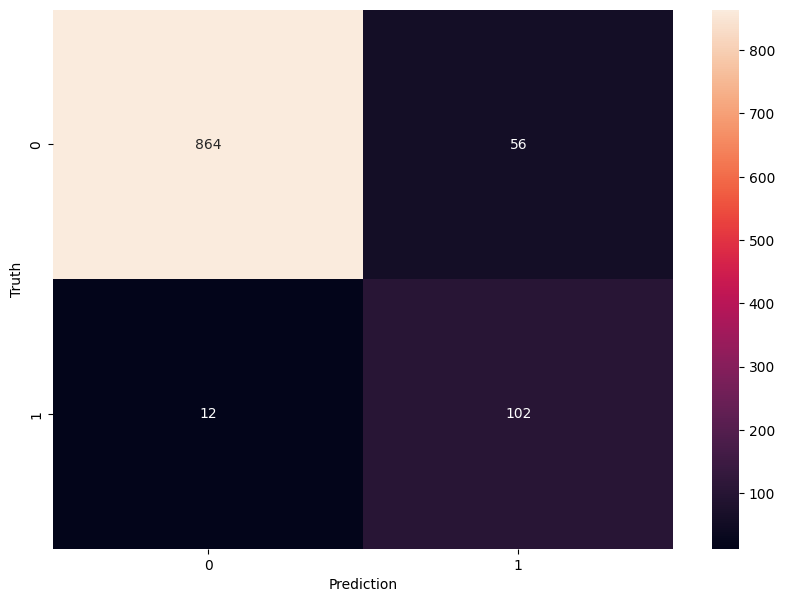

In [20]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [21]:
def predict_spam(email_text):
    # Process the text with spaCy
    doc = nlp(email_text)
    
    # Get the vector representation of the document
    email_vector = doc.vector
    
    # Reshape the vector to be 2D
    email_vector_2d = email_vector.reshape(1, -1)
    
    # Use the classifier to predict
    prediction = clf.predict(email_vector_2d)
    
    return prediction[0]  # Return the prediction (0 for not spam, 1 for spam)

# Example usage
spam_email = "Subject: Urgent: You've Won a $1,000 Gift Card! Claim your prize now at [Link Removed]!"
prediction = predict_spam(spam_email)
print("Spam" if prediction == 1 else "Not Spam")

Spam


In [22]:
# import pickle

# # Assuming clf is your trained classifier
# with open('spam_classifier_using_spacy_model.pkl', 'wb') as file:
#     pickle.dump(clf, file)